In [2]:
import numpy as np
import pdb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'



from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()


# <center> Math 579: Finite Element Project </center>

The goal of this project will be to collaboratively create a software package in Python implementing the Finite Element Method (FEM) to obtain solutions to some simple elliptic partial differential equations. We will study the basic problem formulation and its algorithmic implementation. The focus will be on the numerical tools and it is the intention that no external packages will be used except for possibly the array objects of numpy.

---

## Expected Outcomes: 

The overarching goal of this exercise is to collaboratively create a small software package in Python from scratch. We will learn the basics of object oriented programming, creating software libraries in Python, and working with Github in a group environment. Along with these soft skills, we will learn about:


- Data structures for meshes
- Techniques for triangulation and refinement
- Fast querying methods
- Interpolation techniques

---


## <center> Background </center>


We begin by considering the Poisson equation with Dirichlet boundary conditions,
\begin{cases}
\begin{align} \tag{1}
-\Delta u &= f  &\text{in } \Omega 
\\
u &= g &\text{on } \partial\Omega
\end{align}
\end{cases}

where $\Omega \subset \mathbb{R}^n$ (n = 2,3) bounded, $f \in L^2\left(\Omega\right)$ and $g \in L^2(\partial\Omega)$. In order to account for the inhomogeneous boundary condition, we first let $w = u - g$ and consider the function space,

\begin{equation*}
H^1_{g} = \left\{ u \in H^1(\Omega) | \;\; u\rvert_{\partial \Omega} = g \right\}
\end{equation*}

Provided that $g$ admits an extension, $G$, to the whole domain, this allows us to reformulate the weak problem as follows: find $w \in H^{1}_0 \left(\Omega\right)$ such that:

\begin{equation*} \tag{2}
\int_{\Omega} \nabla w \cdot \nabla v = \int_{\Omega} f v   - \int_{\Omega} \nabla G \cdot \nabla v, \;\; \forall \,v \in H^1_0(\Omega)  
\end{equation*}


### <center> Galerkin Discretization </center>
----

We consider discrete formulation of the problem begins by  the finite dimensional subspaces $X_n \subset H^1(\Omega)$ and $X^0_n \subset X_n \cap H^1_0(\Omega)$. We partition the domain using a conforming triangulation $P$, containing $N$ vertices. As an interpolation basis for $X_n$, we take the nodal interpolants $\left\{\phi_i \right\}_{i}$ where $i = 1,2,..., N$. The basis elements are linear in every element $\tau \in P$ and satisfy:

\begin{equation*}
\phi_i(x_k) = \delta_{i,k}
\end{equation*}

where $x_k$ is the coordinate of the $k^{th}$ vertex. The subspace $X^0_n$ is spanned by $\left\{\phi_k \right\}_{k} \subset \left\{\phi_i \right\}_{i}$, for $k \in I$ where $I$ is an index set containing only labels for the interior nodes. The extension of the Dirichlet condition is then given by,

\begin{equation*}
G(x) = \sum_{k=1}^N g_k \phi_k(x)
\end{equation*}

and the numerical solution is given by

\begin{equation*}
U(x) = \sum_{i \in I} x_k\phi_k(x) + G(x)
\end{equation*}

where the $x_k$ come from the solution of the linear system

\begin{equation*}
Ax = b.
\end{equation*}

This linear system represents the discretization of the weak formulation given by (2). More explicitly, the entries of the stiffness matrix are given by,

\begin{equation*}
A_{ik} = \sum_{\tau \in P} \int_{\tau} \nabla\phi_i \cdot \nabla \phi_k
\end{equation*}

and the entries of the RHS are given by

\begin{equation*}
\sum_{\tau \in P} \int_{\tau} f\phi_i - \sum_{k = 1}^N G_k \sum_{\tau \in P} \int_{\tau} \nabla\phi_i \cdot \nabla \phi_k . 
\end{equation*}


The assembly of the stiffness matrix and RHS is done exactly as described in the reference [1].  

---
**Expected rate of convergence**:

Denote the nodal interpolant, $I_p: C(\Omega) \to X_h$. The following error estimate follows from our analysis in class,

\begin{equation*}
\left\lVert u - I_p(u) \right\rVert_{k,p} \leq C h^{d-k}\lVert u \rVert_{m,p}
\end{equation*}

where d-1 is the order of the polynomial approximation within each element. Since we are considering linear interpolation, a bound for the $H^1$ error is given by,

\begin{equation*}
\left\lVert u - I_p(u) \right\rVert_{1,2} \leq C h \lVert u \rVert_{2,2}
\end{equation*}

thus we expect a linear convergence rate in the $H^1$ norm with respect to the area of the largest triangle. If we only measured the $L^2$ error of our solution then, taking $k=0$ yields

\begin{equation*}
\left\lVert u - I_p(u) \right\rVert_{L^2} \leq C h^2 \lVert u \rVert_{2,2}
\end{equation*}

thus we expect quadratic convergence rate with respect to the area of the largest triangle when measuring the error in the $L^2$ norm. We note also that since our solution is smooth that the contribution from the $H^2$ norm of $u$ is bounded. 

---

 **Evaluting the error**

The $H^1$ and $L^2$ error are given as follows:


\begin{equation*}
\left \lVert v \right \rVert_{\ell^2(\Omega)}^2 = \sum_{i,k} v_i v_k \left< \phi_i, \phi_k \right> = v^T M v
\end{equation*}

\begin{equation*}
\left \lVert \nabla v \right \rVert_{\ell^2(\Omega)}^2 = \sum_{i,k} v_i v_k \left< \nabla\phi_i, \nabla\phi_k \right> = v^T A v
\end{equation*}

where $M$ is the mass matrix and $A$ is the stiffness matrix of the finite element system. To construct these matrices, we denote $u - I_p(u_h) \approx I_p(u - u_h) = e$. Then the mass and stiffness matrices are formulated as follows,   


\begin{equation*}
\begin{aligned}
\left\lVert e \right\rVert_{H^1(\Omega)}^2 & = \int_{\Omega} |\nabla e|^2 + \int_{\Omega}|e|^2
\\
&= \sum_{\tau \in P} \int_{\tau} \sum_{i} \sum_{j} e_i \phi_i(x) e_j \phi_j(x) +  \nabla(e_i \phi_i(x) e_j \phi_j(x))
\\
& = \sum_{\tau \in P} \sum_{i} \sum_{j} e_i e_j(<\phi_i, \phi_j> + <\nabla \phi_i, \nabla \phi_j>)
\\
& = e^T M e + e^T A e
\end{aligned}
\end{equation*}

The construction of the stiffness matrix was given in the reference and has already been computed in the formulation of the linear system, the mass matrix however was not. To compute the mass matrix, we use quadrature following a procedure outlined in [2] (pg. 60). The local mass matrix can be shown to be given by,

\begin{equation*}
A_{ij} = \int_{\tau} \phi_i\phi_j  = \frac{1}{12}(1 + \delta_{i,j})|\tau|
\end{equation*}

the code to assemble this matrix and evaluate the $H^1$ norm is given by the function `H1_norm()` below. 

It should be remarked that we project the analytic solution using the interpolation operator as well. When actually computing the error we refine the mesh, project the analytic solution on this finer mesh and then perform a linear interpolation from the coarser mesh with our numerical solution. The error, $e$, is then given by the difference between the interpolated numerical solution and the analytic solution as evaluated at the vertices of the finer mesh. 

---

We give a short walkthrough on a naive implementation which handles only a square domain. This can serve as a basic framework from which we can generalize. The tasks needed to accomplish this are proposed. 



## <center> Mesh Generation </center>


Below is a simple code to uniformly triangulate and refine a square domain. We use the same data structure as outlined in [1].



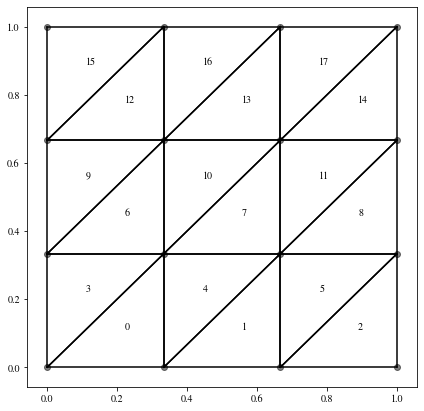

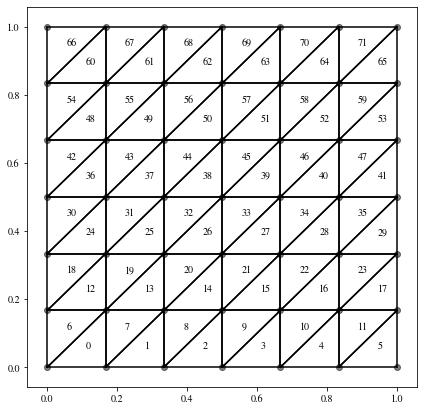

In [4]:
%matplotlib inline
# Triangulation and Refinement Code

def Square_Triangulate(N, x0 = [0,0], x1 = [1,1]):
    """
    Inputs:
    N - Number of point along each axis
    x0,x1 - x,y coordinates of bottom left and top right corners of square. 
    """

    x_coords = np.linspace(x0[0], x1[0], N, endpoint = True)
    y_coords = np.linspace(x0[1], x1[1], N, endpoint = True)

    # Put this into a meshgrid for easier access to coordinate values.

    [X,Y] = np.array(np.meshgrid(x_coords, y_coords))
    #Put this in a more convenient form:
    Nodes = np.zeros([N**2, 3])
    Nodes[:,0], Nodes[:,1], Nodes[:,2] = np.arange(0,int(N**2), dtype = int), X.reshape([N**2,]), Y.reshape([N**2,])
    
    # Label and create triangulated mesh data structure
    E_u1 = []
    E_u2 = []
    E_u3 = []
    for i in range(0, N-1):
        b = i*N  #beginning in nodes
        l_row = Nodes[b:b+N,0].copy()
        u_row = Nodes[b+N:b+2*N,0].copy()
        E_u1 += list(l_row[0:N-1])
        E_u2 += list(l_row[1:N])
        E_u3 += list(u_row[1:N])
        E_u1 += list(l_row[0:N-1])
        E_u2 += list(u_row[0:N-1])
        E_u3 += list(u_row[1:N])
        
        
    M = len(E_u1)
    E = np.zeros([M, 4], dtype = int)  
    E[:,0] = np.arange(0, M, dtype = int) # "--------=----------"
    E[0:len(E_u1),1] = E_u1
    E[0:len(E_u2),2] = E_u2
    E[0:len(E_u3),3] = E_u3

    return E, Nodes, [X,Y]


# Function to plot mesh
def Mesh_Plot(E, Nodes, boundary = None):
    """
    Function to output plot of the mesh created with labelled elements
    """
    fig = plt.figure(figsize = (7,7))

    #First create scatter plot with all the nodes
    
    plt.scatter(Nodes[:,1], Nodes[:,2], c = "k", alpha = 0.5)
    
    #Then plot lines and label elements
    for row in E:
        num = row[0]
        xs = Nodes[row[1::],1]
        ys = Nodes[row[1::], 2]
        # calculate center of element
        x_c, y_c = np.sum(xs)/3, np.sum(ys)/3                     
        plt.text(x_c, y_c, s = "%d" %num, fontsize = 10)
                                                              
        # Add lines connecting the nodes for each element
        plt.plot([xs[0], xs[1]], [ys[0], ys[1]], c= "k")
        plt.plot([xs[1], xs[2]], [ys[1], ys[2]], c= "k")
        plt.plot([xs[2], xs[0]], [ys[2], ys[0]], c= "k")
    
    if boundary != None:
        plt.scatter(Nodes[boundary,1], Nodes[boundary, 2], c = "b")
        
    return



def red_refinement(N,num):
    """
    N = starting number of nodes, i  = number of refinements
    returns an array of # num of nodes along each axis at each stage
    """
    ref = [N]
    for n in range(num-1):
        ref.append(2*ref[n]-1)

    return ref

Ns = red_refinement(4, 2)

E, Nodes, Mesh = Square_Triangulate(Ns[0])
Mesh_Plot(E, Nodes)

E, Nodes, Mesh = Square_Triangulate(Ns[1])
Mesh_Plot(E, Nodes)

This code is obviously not generalized but it outlines the basic data structure: an array which stores some identifier for a given triangle and the coordinates of its vertices. We also have specified the points and shape of the triangles. In order for these to be a variable input, we require an algorithm to triangulate a given set of points within a domain. Moreover, to incorporate a boundary we will need to first discretize the boundary and constrain the triangulation such that it remains conforming to the boundary. On top of these considerations, the final data structure should contain some identification of the boundary nodes or a function which can perform this task.  



## Tasks (I):

- Generate polyhedra approximating a closed, convex domain in $\mathbb{R}^2$. 
- Write an implementation of the Delaunay Triangulation which creates a conforming triangulation of the planar domain.
- Create an implementation to perform adaptive refinement

---

Reference: https://people.eecs.berkeley.edu/~jrs/meshpapers/delnotes.pdf

## <center> Solution Algorithms </center>

Below are the classes to assemble the local stiffness matrix, load vector, and the algorithm to solve the linear system resulting from the discretization of the weak formulation. 


In [35]:

# Code to assemble elemental stiffness matrices:
class Stiffness(object):

    def __init__(self, Elements, Nodes):
        self.E = Elements
        self.Nodes = Nodes
        return

    def loc(self, element = 0):
        # returns local stiffness matrix for a certain element
        N_s = self.E[element, :][1::]

        x_s = self.Nodes[N_s, 1]
        y_s = self.Nodes[N_s, 2]

        T = 0.5*abs(((x_s[1]- x_s[0])*(y_s[2]-y_s[0]) - \
                 (x_s[2]-x_s[0])*(y_s[1]-y_s[0])))

        Gg = np.linalg.inv(np.array([[1,1,1],x_s,y_s]))
        g = np.array([[0,0],[1,0],[0,1]])
        G = np.matmul(Gg, g)
        # M = T*np.matmul(G, G.T)
        M = (0.5)*abs(np.linalg.det(np.array([[1,1,1],x_s,y_s])))*np.matmul(G, G.T)

        return M

#------------------------------------------------------------------------------

# RHS assembly

class RHS(object):
    """
    Class to store the RHS of our problem,
    input is the forcing function (RHS) of the problem

    input: F[X,Y]: Omega \to R^N,
    N is the number of nodes, X,Y \in R^{N^2}.
    """

    def __init__(self, f, g, elements, nodes):
        # make sure these are callable
        self.f = f
        self.g = g
        self.E = elements
        self.Nodes = nodes
        return

    def b(self, boundary):
       # Calculates volume force at every node
        F_vol = np.zeros([len(self.Nodes[:,0]),])
        for e in range(len(self.E[:,0])):
            n_s = self.E[e, 1::]
            X,Y = self.Nodes[n_s, 1], self.Nodes[n_s,2]
            Area = 0.5*abs((X[1] - X[0])*(Y[2]-Y[0]) - (X[2]-X[0])*(Y[1]-Y[0]))
            i = 0
            for n in n_s:
                F_vol[n] += (1/3)*Area*self.f(X[i], Y[i])
                i +=1

        return F_vol
    
    

def on_boundary(Nodes):

    bn = [] # Boundary nodes
    eps = 1e-11
    for i in range(len(Nodes[:,0])):
        n, x, y = Nodes[i,0], Nodes[i,1], Nodes[i,2]

        # This is just for the square

        if (x < eps) or x > (1 - eps) or y < eps or y > (1-eps):
            bn.append(int(n))

    return bn




In [36]:
#------------------ Algorithm implementation--------------------------------
def Solve(mesh_func, N, U_exact, F, boundary, size = False):


    # Set up computational domain
    E, Nodes, Mesh = mesh_func(N)

    # Identify boundary
    bn = boundary(Nodes)
    
    NN = N**2
    
    if size != False:
        NN = size
    
        
    M = Stiffness(E, Nodes)
    rhs = RHS(f = F, g = U_exact, elements = E, nodes = Nodes)

    # Extension of initial condition is just U itself.

    #Assemble full Stiffness matrix and then delete boundary data:
    A = np.zeros([NN,NN], dtype = "float")
    for e in E[:,0]:
        N_s = E[e,1::]
        M_loc = M.loc(e)
        for i in range(3):
            for j in range(3):
                A[N_s[i], N_s[j]] += M_loc[i,j]

    B = rhs.b(boundary = bn)

    # remove nodes corresponding to boundary data:

    # for the array it's a bit trickier
    # first define a list without the elements in bn
    nns = np.arange(0, len(Nodes[:,1]))

    not_bn = np.array([x for x in nns if x not in bn])

    #delete these rows and columns
    A_in = A[not_bn,:][:,not_bn]

    # Apply M to G    
    if size == False:
        G_init = U_exact(Nodes[:,1], Nodes[:,2])
        u_D = G_init.copy()
    else:
        G_init = U_exact(Nodes[:,1], Nodes[:,2])
        u_D = G_init.copy()
        
    # Set G to zero except for the boundary.
    u_D[not_bn] = 0.
    AG = np.matmul(A[not_bn,:], u_D)

    B_in = B[not_bn] - AG


    # Finally invert
    #U_in = np.matmul(np.linalg.inv(A_in), B_in)
    U_in = np.linalg.solve(A_in, B_in)
    
    # Combine with boundary data:
    U  = np.zeros([NN,], dtype = "float")
    U[not_bn] = U_in
    U += u_D

    return U, G_init




## <center> Interpolation and Querying </center>


Given a mesh and a solution at the nodes, the next step will be to perform an interpolation on this data structure. Below is a linear interpolation scheme using scipy's cKDTree to query the closest nodes to a given point at which we wish to evaluate. It then calculates the barycentric weights for the nodal values of U within that triangle, by solving the linear system:


$$\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 
\end{bmatrix}
\begin{bmatrix}
 w_1 \\
 w_2 \\
 w_2 
\end{bmatrix}
= 
\begin{bmatrix}
x_q\\
y_q \\
1
\end{bmatrix}
$$

where $(x_i, y_i)$ for $i = 1,2,3$ are the coordinates of the nearest nodes, $w_i$ are the weights, and $(x_q, y_q)$ is the query point. The value of $u(x_q, y_q)$ is then given as

$$ u(x_q, y_q) = \frac{1}{w_1 + w_2 + w_3}(w_1 u(x_1,y_1) + w_2 u(x_2,y_2) + w_3 u(x_3,y_3)) $$.



In [ ]:
import scipy.spatial
class Linear_interp(object):
    
    """
    Class to perform linear interpolation on a triangulated grid
    Nodes, Elements and Values at the vertices are used to initialize
    interpolator.
    """
    
    def __init__(self, elements, nodes, U):
        self.nodes = nodes.copy()
        self.E = elements.copy()
        self.u = U.copy()
        return
    
    def eval(self, x_q, y_q, point = False):
        """
        Inputs x_q, y_q are the query points in the form of 1D arrays.
        
        Output: array of points corresponding to a linear interpolation
        of the mesh function
        """
        
        xs = self.nodes[:,1]
        ys = self.nodes[:,2]
        XY_C = np.zeros([len(xs),2])
        XY_C[:,0] = xs
        XY_C[:,1] = ys
            
        mytree = scipy.spatial.cKDTree(XY_C)
        
        XY_q = np.zeros([len(x_q),2])
        XY_q[:,0] = x_q
        XY_q[:,1] = y_q


        # now query points in triangulation,
        # the k argument asks for 3 nearest neighbours
        dist, indices = mytree.query(x = XY_q, k = 3)

#-------Can now perform linear interpolation with these distances and indices------------

        # Solve linear system for the weights in barycentric coordinates
        # Loop over rows:
        i = 0
        u_ref = []

        for row in indices:
            u_p = np.array(self.u[row])
            A = np.array([np.array(xs[row]), np.array(ys[row]),[1,1,1]])

            if np.linalg.cond(A) < 1e11:
                B = np.linalg.inv(A)
                b = np.array([x_q[i], y_q[i],1])
                w = np.matmul(B,b)
                u_av = (1/np.sum(w))*(np.sum(u_p*w))
                u_ref.append(u_av)
            else:
                u_av = (1/np.sum(dist[i]))*np.sum((np.array(dist[i])*u_p))
                u_ref.append(u_av)

            i+=1

        return np.array(u_ref)

## Tasks (II):

- Create an implementation which does not use an external package
- Combine this interpolation routine with the mesh generation
- Create convenient data structure for refinement

 ## <center> Numerical Experiment</center>
 
 With the numerical implementation now developed, we seek to estimate the $H^1\left(\Omega\right)$ error of the numerical solution. We consider the following equation defined a square domain, 
 

\begin{align}
-\Delta u &= 10\sin(3x)\cos(y)  &\text{    in    } \Omega 
\\
u &= \sin(3x)\cos(y) &\text{    on    } \partial\Omega
\end{align}


with exact solution $u_{ex} = \sin(3x)\cos(y)$. It is apparent that the exact solution of this problem is the boundary condition extended to the entirety of the domain. Thus, if were to extend the boundary condition to the whole domain, $w = u - g$ would be identically 0. We thus consider an extension using a smooth cut-off function $g\chi$ where $\chi = 1$ on $\partial \Omega$ and $\chi = 0$ on $\omega \subset \Omega$ where $\omega$ contains all the interior nodes of the triangulation. With an implementation, we can start by testing our efficiency and accuracy using this numerical experiment. 


---

In [39]:
def H1_norm(E, Nodes, U, which = None):

    #Assemble full Stiffness and Mass matrices
    N = len(Nodes[:,0])
    A = np.zeros([N,N], dtype = "float")
    M = Stiffness(E, Nodes)

    Mass = np.zeros([N,N], dtype = "float")
    Mass_loc = (1/12)*np.array([[2,1,1],[1,2,1],[1,1,2]])
    
    for e in E[:,0]:
        N_s = E[e,1::]
        [X,Y] = [Nodes[N_s, 1], Nodes[N_s,2]]
        J = abs((X[1] - X[0])*(Y[2]-Y[0]) - (X[2]-X[0])*(Y[1]-Y[0]))
        Area = 0.5*J
        mass_loc = Area*Mass_loc
        M_loc = M.loc(e)
        # Add entries to global stiffness and mass matrices
        for i in range(3):
            for j in range(3):
                A[N_s[i], N_s[j]] += M_loc[i,j]
                Mass[N_s[i], N_s[j]] += mass_loc[i,j]

    u = U.reshape([N,]).copy()
    
    if which == None:
        
        error = np.sqrt(np.matmul(u, np.matmul(Mass,u)) + np.matmul(u, np.matmul(A,u)))
        
        return error
    
    if which == "L2":
        error = np.sqrt(np.matmul(u, np.matmul(Mass, u)))
        
        return error

        

## Final Remarks:

If this project would interest you please email me at seth.taylor@mail.mcgill.ca. In your email if you please include which subjects would be of interest to you and also include your github account name. I will begin building the basic framework for the software package along with a tutorial on how to get started using it. 

---
**References**:

[1]: Alberty, Jochen, Carsten Carstensen, and Stefan A. Funken. "Remarks around 50 lines of Matlab: short finite element implementation." Numerical algorithms 20.2-3 (1999): 117-137.

[2]: Larson, Mats G., and Fredrik Bengzon. "The finite element method: theory, implementation, and practice." Texts in Computational Science and Engineering 10 (2010).

[3]: Brenner, Susanne, and Ridgway Scott. The mathematical theory of finite element methods. Vol. 15. Springer Science & Business Media, 2007.